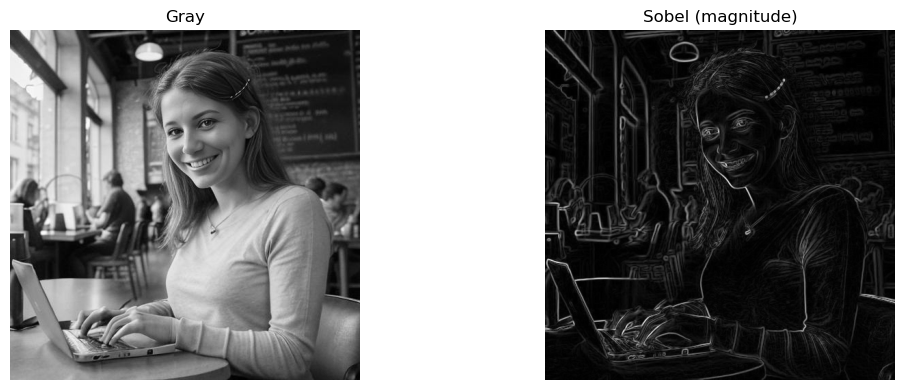

In [2]:
import matplotlib.pyplot as plt
from skimage import color, img_as_float
from skimage.filters import sobel
from skimage.io import imread
img= imread("photo.jpeg")
gray = color.rgb2gray(img) if img.ndim == 3 else img
gray = img_as_float(gray)

edges_sobel = sobel(gray)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap="gray"); plt.title("Gray"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(edges_sobel, cmap="gray"); plt.title("Sobel (magnitude)"); plt.axis("off")
plt.tight_layout(); plt.show()

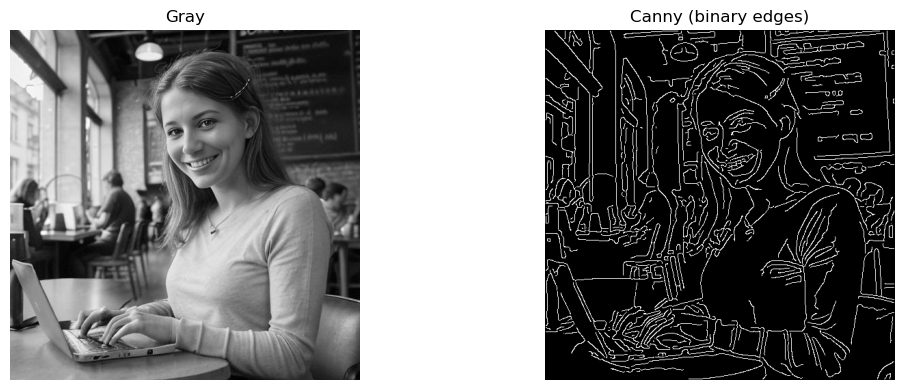

In [4]:
from skimage.feature import canny
from skimage.filters import gaussian

# Canny genelde önce hafif blur ister
g = gaussian(gray, sigma=1.2)

edges_canny = canny(g, sigma=1.2, low_threshold=0.08, high_threshold=0.20)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap="gray"); plt.title("Gray"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(edges_canny, cmap="gray"); plt.title("Canny (binary edges)"); plt.axis("off")
plt.tight_layout(); plt.show()

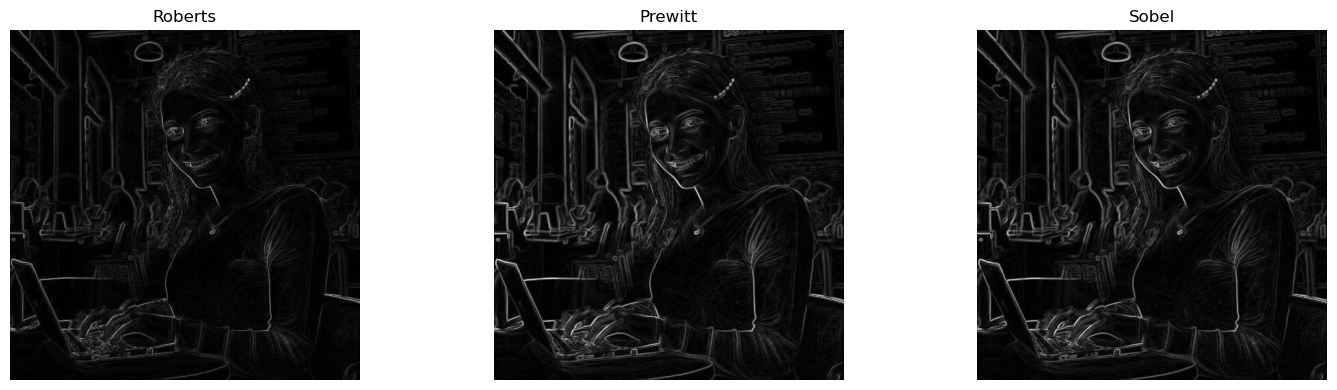

In [6]:
from skimage.filters import prewitt, roberts

edges_prewitt = prewitt(gray)
edges_roberts = roberts(gray)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1); plt.imshow(edges_roberts, cmap="gray"); plt.title("Roberts"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(edges_prewitt, cmap="gray"); plt.title("Prewitt"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(edges_sobel, cmap="gray"); plt.title("Sobel"); plt.axis("off")
plt.tight_layout(); plt.show()

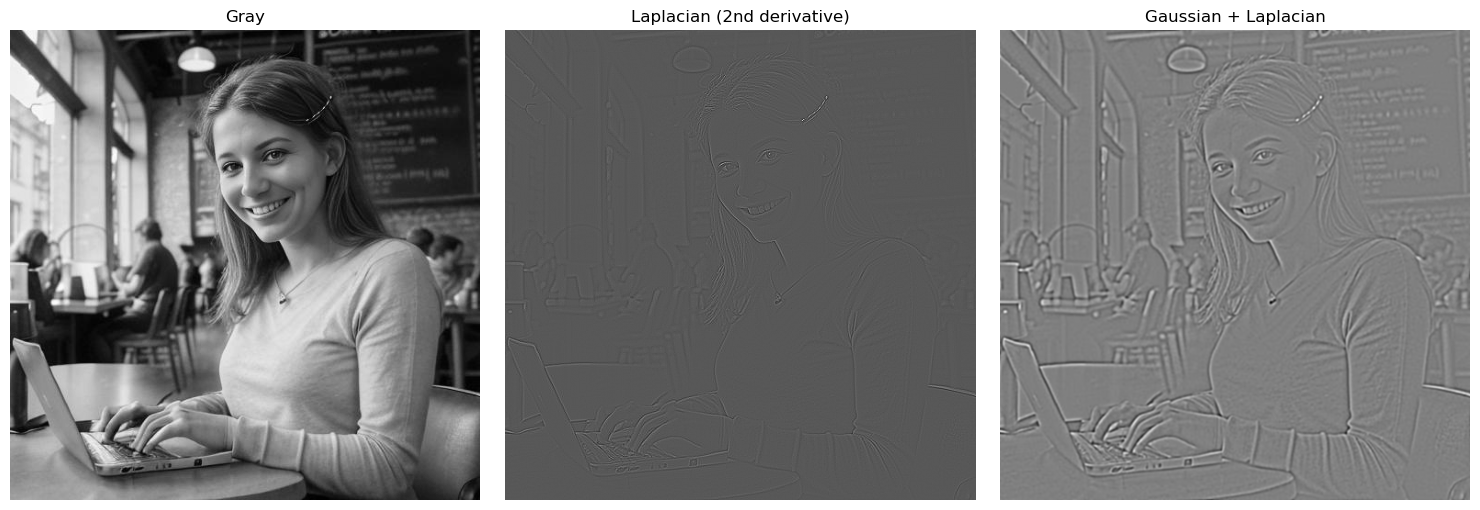

In [10]:
import matplotlib.pyplot as plt
from skimage import color, img_as_float, filters

# 1) grayscale + float
gray = color.rgb2gray(img) if img.ndim == 3 else img
gray = img_as_float(gray)

# 2) Laplacian (doğrudan)
lap = filters.laplace(gray, ksize=3)

# 3) Gaussian + Laplacian (daha stabil)
g = filters.gaussian(gray, sigma=1.2)
lap_g = filters.laplace(g, ksize=3)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(lap, cmap="gray")
plt.title("Laplacian (2nd derivative)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(lap_g, cmap="gray")
plt.title("Gaussian + Laplacian")
plt.axis("off")

plt.tight_layout()
plt.show()